In [1]:
# x = [240, 750, 1020, 1400, 1700, 2300, 2900]
# y = [7.0, 22.4, 29.7, 40.9, 52.3, 70.5, 85,.1]

# Hypothesis: h(x) = theta0 + theta1*x
# Parameters: theta0, theta1
# Cost Function: J(theta0, theta1) = 1/2m Sum_1toM (h(X) - Y)^2
# Goal: minimize J(theta0, theta1)

# y_hat = theta0*b + theta1*x | Z = Theta^T X
# theta = theta - alpha * d/d*theta J(theta0, theta1)
# theta1 = theta1 - alpha * d/d*theta1 J(theta0, theta1)
# theta0 = theta0 - alpha * d/d*theta0 J(theta0, theta1)

In [31]:
import numpy as np
from matplotlib import pyplot as plt

x = np.array([240, 750, 1020, 1400, 1700, 2300, 2900])
y = np.array([7.0, 22.4, 29.7, 40.9, 52.3, 70.5, 85.1])

In [32]:
x_max = np.max(x)
y_max = np.max(y)

In [33]:
x = x/x_max
y = y/y_max

In [34]:
# print(x.size)

x_train = np.ones([2, x.size])
x_train[1] = x; # x_train[1, :] = x;
print(x_train)

[[1.         1.         1.         1.         1.         1.
  1.        ]
 [0.08275862 0.25862069 0.35172414 0.48275862 0.5862069  0.79310345
  1.        ]]


In [35]:
def init_param():
    theta = np.random.rand(1, 2)
    return theta

# print(init_param())

def sigmoid(z):
    return 1.0/(1+np.exp(-z))

def derivative_sigmoid(z):
    return sigmoid(z)*(1-sigmoid(z))

In [49]:
def ReLU(z):
    return np.max(z, 0)

def forward_prop(theta, x):
    z = theta.dot(x)
    # z = np.multiply(theta, x)
    h = ReLU(z)
    return z, h


def derivative_ReLU(z):
    return z > 0

def backward_prop(X, Y, z, h, theta, alpha, m):
    s_del = h - Y
    deriv = derivative_ReLU(z)
    s_del = np.multiply(s_del, deriv)
    b_del = s_del.dot(X.T)
    theta = theta-(1/m)*alpha*b_del
    return theta

def get_error(h, y):
    return np.sum(np.multiply((h-y), (h-y)))/y.size

def gradient_decent(X, Y, iteration):
    theta = init_param()
    for i in range(iteration):
        z, h = forward_prop(theta, X)
        theta = backward_prop(X, Y, z, h, theta, .1, y.size)
        if (i%1000 == 0):
            print('iteration', i)
            print('error', get_error(h, Y))

    return theta

In [50]:
final_theta = gradient_decent(x_train, y, 10000)

iteration 0
error 0.26211643095093223
iteration 1000
error 0.00018386616873587123
iteration 2000
error 0.0001837079789446615
iteration 3000
error 0.00018370797870978812
iteration 4000
error 0.00018370797870978744
iteration 5000
error 0.000183707978709786
iteration 6000
error 0.000183707978709786
iteration 7000
error 0.000183707978709786
iteration 8000
error 0.000183707978709786
iteration 9000
error 0.000183707978709786


In [68]:
Predict_X = np.array([500, 1500, 2000])
Predict_X = Predict_X / x_max

Test_Prd_X = np.ones([2, Predict_X.size])
Test_Prd_X[1] = Predict_X

Predicted_Y = final_theta.dot(Test_Prd_X)

In [58]:
print(Predicted_Y*y_max)

[[14.87143478 44.79800696 59.76129305]]


[[0.08331993 0.26266836 0.35761754 0.4912497  0.59674878 0.80774694
  1.0187451 ]]


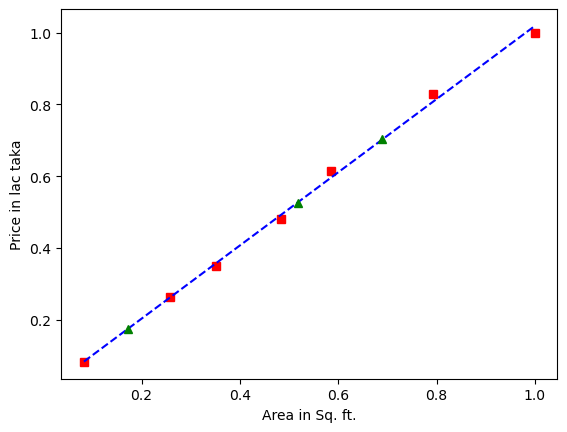

In [69]:
def plot_carve(X, Y, theta):
    y_cal = theta.dot(X)
    # plt.plot(X[1], (Y.T), 'rs', X[1], (y_cal.T), 'b--')
    plt.plot(X[1], (Y.T), 'rs', X[1], (y_cal.T), 'b--', Predict_X, (Predicted_Y.T), 'g^')
    plt.xlabel('Area in Sq. ft.')
    plt.ylabel('Price in lac taka')
    return y_cal

print(plot_carve(x_train, y, final_theta))